In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose

In [11]:
raw_data = pd.read_csv('IndexE8.csv')
df_comp = raw_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst=True)
df_comp.set_index('date', inplace=True)
df_comp = df_comp.asfreq('b')
df_comp = df_comp.fillna(method='ffill')

In [12]:
df_comp['market_value'] = df_comp.spx
del df_comp['spx'],df_comp['dax'],df_comp['ftse'],df_comp['nikkei']
size = int(len(df_comp)*0.8)
train_df = df_comp.iloc[:size]
test_df = df_comp.iloc[size:]

In [13]:
train_df['return1'] = train_df.market_value.pct_change(1).mul(100)

<ipython-input-13-45c5a5f434a0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['return1'] = train_df.market_value.pct_change(1).mul(100)


In [14]:
train_df = train_df.iloc[1:]

In [15]:
train_df

,market_value,return1
date,,
1994-01-10,475.270000,1.142796
1994-01-11,474.130000,-0.239864
1994-01-12,474.170000,0.008437
1994-01-13,472.470000,-0.358521
1994-01-14,474.910000,0.516435
...,...,...
2013-04-01,1562.173837,-0.446858
2013-04-02,1570.252238,0.517126
2013-04-03,1553.686978,-1.054943


In [7]:
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2

In [17]:
model_ar = ARMA(train_df.return1 , order = (1,0))
results_ar = model_ar.fit()
results_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                return1   No. Observations:                 5020
Model:                     ARMA(1, 0)   Log Likelihood               -8067.541
Method:                       css-mle   S.D. of innovations              1.207
Date:                Wed, 14 Oct 2020   AIC                          16141.081
Time:                        14:18:45   BIC                          16160.645
Sample:                    01-10-1994   HQIC                         16147.937
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0311      0.016      1.959      0.050   -1.03e-05       0.062
ar.L1.return1    -0.0719      0.014     -5.108      0.000      -0.099      -0.044
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -13.9069           +0.0000j           13.9069            0.5000
-----------------------------------------------------------------------------
"""

In [18]:
model_ar2 = ARMA(train_df.return1 , order = (2,0))
results_ar2 = model_ar2.fit()
results_ar2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                return1   No. Observations:                 5020
Model:                     ARMA(2, 0)   Log Likelihood               -8063.177
Method:                       css-mle   S.D. of innovations              1.206
Date:                Wed, 14 Oct 2020   AIC                          16134.354
Time:                        14:22:25   BIC                          16160.439
Sample:                    01-10-1994   HQIC                         16143.494
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0311      0.015      2.042      0.041       0.001       0.061
ar.L1.return1    -0.0749      0.014     -5.312      0.000      -0.103      -0.047
ar.L2.return1    -0.0417      0.014     -2.955      0.003      -0.069      -0.014
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.8987           -4.8154j            4.8986           -0.2794
AR.2           -0.8987           +4.8154j            4.8986            0.2794
-----------------------------------------------------------------------------
"""

In [23]:
model_ar3 = ARMA(train_df.return1 , order = (3,0))
results_ar3 = model_ar3.fit()
results_ar3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                return1   No. Observations:                 5020
Model:                     ARMA(3, 0)   Log Likelihood               -8062.879
Method:                       css-mle   S.D. of innovations              1.206
Date:                Wed, 14 Oct 2020   AIC                          16135.758
Time:                        14:24:11   BIC                          16168.364
Sample:                    01-10-1994   HQIC                         16147.184
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0311      0.015      2.065      0.039       0.002       0.061
ar.L1.return1    -0.0754      0.014     -5.339      0.000      -0.103      -0.048
ar.L2.return1    -0.0425      0.014     -3.005      0.003      -0.070      -0.015
ar.L3.return1    -0.0109      0.014     -0.772      0.440      -0.039       0.017
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.8476           -3.9608j            4.0505           -0.2164
AR.2            0.8476           +3.9608j            4.0505            0.2164
AR.3           -5.5964           -0.0000j            5.5964           -0.5000
-----------------------------------------------------------------------------
"""

In [24]:
def LLR_test(mod_1,mod_2,DF=1):
    
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    P = chi2.sf(LR,DF).round(3)
    
    return P

In [25]:
LLR_test(model_ar,model_ar2)

0.003

In [26]:
LLR_test(model_ar2,model_ar3)

0.44

Noramlization

In [27]:
bechmark = train_df.market_value[0]
train_df['norm'] = train_df.market_value.div(bechmark).mul(100)

In [28]:
train_df.head()

,market_value,return1,norm
date,,,
1994-01-10,475.27,1.142796,100.000000
1994-01-11,474.13,-0.239864,99.760136
1994-01-12,474.17,0.008437,99.768553
1994-01-13,472.47,-0.358521,99.410861
1994-01-14,474.91,0.516435,99.924254


In [29]:
sts.adfuller(train_df.norm)

(-1.7396871077371265,
 0.4107891338207882,
 18,
 5001,
 {'1%': -3.431658270286891,
  '5%': -2.8621181140235223,
  '10%': -2.5670777307913744},
 24351.278699350325)

In [30]:
bech_return1 = train_df.return1[0]
train_df['norm_return'] = train_df.return1.div(bech_return1).mul(100)

In [31]:
sts.adfuller(train_df.norm_return)

(-17.03445719098115,
 8.28053702031742e-30,
 17,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 60636.5822032878)

In [32]:
model_ar = ARMA(train_df.norm_return , order = (1,0))
results_ar = model_ar.fit()
results_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            norm_return   No. Observations:                 5020
Model:                     ARMA(1, 0)   Log Likelihood              -30515.434
Method:                       css-mle   S.D. of innovations            105.618
Date:                Wed, 14 Oct 2020   AIC                          61036.869
Time:                        14:38:07   BIC                          61056.432
Sample:                    01-10-1994   HQIC                         61043.724
                         - 04-05-2013                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2.7250      1.391      1.959      0.050      -0.001       5.451
ar.L1.norm_return    -0.0719      0.014     -5.108      0.000      -0.099      -0.044
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -13.9069           +0.0000j           13.9069            0.5000
-----------------------------------------------------------------------------
"""

In [33]:
model_ar2 = ARMA(train_df.norm_return , order = (2,0))
results_ar2 = model_ar2.fit()
results_ar2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            norm_return   No. Observations:                 5020
Model:                     ARMA(2, 0)   Log Likelihood              -30511.071
Method:                       css-mle   S.D. of innovations            105.527
Date:                Wed, 14 Oct 2020   AIC                          61030.142
Time:                        14:38:30   BIC                          61056.226
Sample:                    01-10-1994   HQIC                         61039.282
                         - 04-05-2013                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2.7243      1.334      2.042      0.041       0.110       5.339
ar.L1.norm_return    -0.0749      0.014     -5.312      0.000      -0.103      -0.047
ar.L2.norm_return    -0.0417      0.014     -2.955      0.003      -0.069      -0.014
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.8987           -4.8155j            4.8986           -0.2794
AR.2           -0.8987           +4.8155j            4.8986            0.2794
-----------------------------------------------------------------------------
"""

In [34]:
model_ar7 = ARMA(train_df.norm_return , order = (7,0))
results_ar7 = model_ar7.fit()
results_ar7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            norm_return   No. Observations:                 5020
Model:                     ARMA(7, 0)   Log Likelihood              -30502.512
Method:                       css-mle   S.D. of innovations            105.347
Date:                Wed, 14 Oct 2020   AIC                          61023.023
Time:                        14:39:50   BIC                          61081.714
Sample:                    01-10-1994   HQIC                         61043.589
                         - 04-05-2013                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2.7252      1.188      2.294      0.022       0.397       5.053
ar.L1.norm_return    -0.0774      0.014     -5.485      0.000      -0.105      -0.050
ar.L2.norm_return    -0.0451      0.014     -3.187      0.001      -0.073      -0.017
ar.L3.norm_return    -0.0140      0.014     -0.992      0.321      -0.042       0.014
ar.L4.norm_return    -0.0147      0.014     -1.038      0.299      -0.042       0.013
ar.L5.norm_return    -0.0386      0.014     -2.730      0.006      -0.066      -0.011
ar.L6.norm_return    -0.0232      0.014     -1.638      0.101      -0.051       0.005
ar.L7.norm_return    -0.0389      0.014     -2.762      0.006      -0.067      -0.011
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2978           -0.7660j            1.5070           -0.0849
AR.2            1.2978           +0.7660j            1.5070            0.0849
AR.3            0.2153           -1.6118j            1.6261           -0.2289
AR.4            0.2153           +1.6118j            1.6261            0.2289
AR.5           -1.5925           -0.0000j            1.5925           -0.5000
AR.6           -1.0143           -1.2874j            1.6389           -0.3562
AR.7           -1.0143           +1.2874j            1.6389            0.3562
-----------------------------------------------------------------------------
"""

In [35]:
model_ar7 = ARMA(train_df.return1 , order = (7,0))
results_ar7 = model_ar7.fit()
results_ar7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                return1   No. Observations:                 5020
Model:                     ARMA(7, 0)   Log Likelihood               -8054.618
Method:                       css-mle   S.D. of innovations              1.204
Date:                Wed, 14 Oct 2020   AIC                          16127.236
Time:                        14:42:06   BIC                          16185.926
Sample:                    01-10-1994   HQIC                         16147.802
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0311      0.014      2.294      0.022       0.005       0.058
ar.L1.return1    -0.0774      0.014     -5.485      0.000      -0.105      -0.050
ar.L2.return1    -0.0451      0.014     -3.187      0.001      -0.073      -0.017
ar.L3.return1    -0.0140      0.014     -0.992      0.321      -0.042       0.014
ar.L4.return1    -0.0147      0.014     -1.038      0.299      -0.042       0.013
ar.L5.return1    -0.0386      0.014     -2.730      0.006      -0.066      -0.011
ar.L6.return1    -0.0232      0.014     -1.638      0.101      -0.051       0.005
ar.L7.return1    -0.0389      0.014     -2.762      0.006      -0.067      -0.011
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2978           -0.7660j            1.5070           -0.0849
AR.2            1.2978           +0.7660j            1.5070            0.0849
AR.3            0.2153           -1.6118j            1.6261           -0.2289
AR.4            0.2153           +1.6118j            1.6261            0.2289
AR.5           -1.5925           -0.0000j            1.5925           -0.5000
AR.6           -1.0143           -1.2874j            1.6389           -0.3562
AR.7           -1.0143           +1.2874j            1.6389            0.3562
-----------------------------------------------------------------------------
"""

### Residuals Analysis

In [36]:
train_df['res_priec'] = results_ar7.resid

In [37]:
train_df.res_priec.mean()

3.9039505003599305e-05

In [38]:
train_df.res_priec.var()

1.4496606672063954

In [39]:
sts.adfuller(train_df.res_priec)

(-70.7726312642594,
 0.0,
 0,
 5019,
 {'1%': -3.4316535759402753,
  '5%': -2.8621160400844468,
  '10%': -2.567076626752987},
 16032.275106718118)

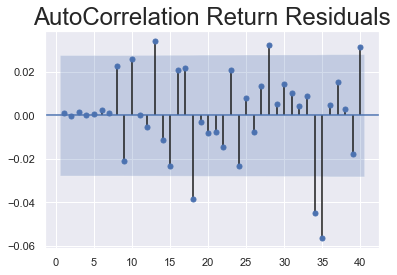

In [41]:
sgt.plot_acf(train_df.res_priec, zero=False, lags=40)
plt.title('AutoCorrelation Return Residuals', size=24)
plt.show()

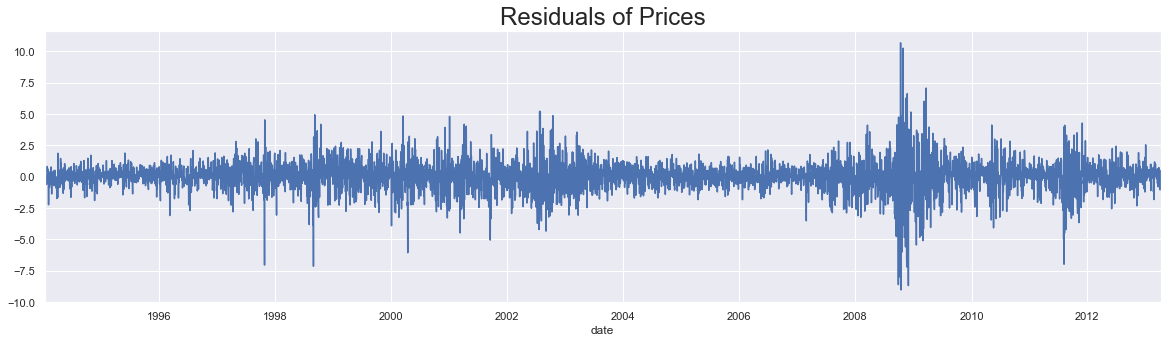

In [42]:
train_df.res_priec[1:].plot(figsize=(20,5))
plt.title("Residuals of Prices", size=24)
plt.show()

In [ ]:
model_ar7 = ARMA(train_df.market_value , order = (7,0))
results_ar7 = model_ar7.fit()
results_ar7.summary()